In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import gc

In [2]:
data = pd.read_csv("datasets/train_dataset.csv")
data.head(3)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,35,971,3,4,5,4,2,3,3,2,...,373,358.0,0,1,1,0,0,1,0,neutral or dissatisfied
1,32,1092,0,0,0,3,1,0,1,1,...,0,0.0,0,1,1,0,0,1,0,satisfied
2,46,2915,0,5,0,5,3,4,5,1,...,0,0.0,1,0,1,0,1,0,0,satisfied


In [3]:
data.shape

(50761, 26)

In [4]:
data.dtypes

Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Gender_Female                          int64
Gender_Male                            int64
Type of Travel_Business travel         int64
Type of Travel_Personal Travel         int64
Class_Busi

In [5]:
data.isnull().mean()

Age                                  0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
Gender_Female                        0.0
Gender_Male                          0.0
Type of Travel_Business travel       0.0
Type of Travel_Personal Travel       0.0
Class_Business                       0.0
Class_Eco                            0.0
Class_Eco Plus  

In [6]:
data[data.duplicated()]

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction


In [7]:
data["satisfaction"].value_counts()

neutral or dissatisfied    28764
satisfied                  21997
Name: satisfaction, dtype: int64

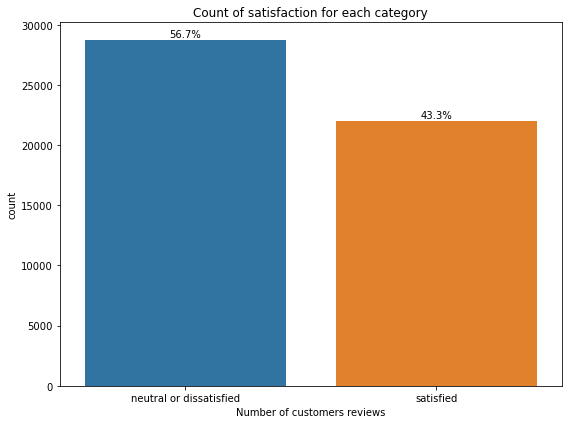

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x = "satisfaction",
    data=data)
total = len(data)
plt.title("Count of satisfaction for each category")
plt.xlabel("Number of customers reviews")

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()
plt.show()

In [9]:
def gender(df):
    if df["Gender_Female"] == 1:
        return "F"
    else:
        return "M"

In [10]:
data["Gender"] = data.apply(gender, axis=1)
data.drop(["Gender_Female",
           "Gender_Male"],
           axis=1,
           inplace=True)

In [11]:
def typeTravel(df):
    if df["Type of Travel_Business travel"] == 1:
        return "Business"
    else:
        return "Personal"

In [12]:
data["Type_of_travel"] = data.apply(typeTravel, axis=1)
data.drop(["Type of Travel_Business travel",
           "Type of Travel_Personal Travel"],
          axis=1,
          inplace=True)

In [13]:
def typeClass(df):
    if df["Class_Business"] == 1:
        return "Business"
    elif df["Class_Eco"] == 1:
        return "Eco"
    else:
        return "Eco Plus"

In [14]:
data["Class"] = data.apply(typeClass, axis=1)
data.drop(["Class_Business",
           "Class_Eco",
           "Class_Eco Plus"],
          axis=1,
          inplace=True)

In [15]:
data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender,Type_of_travel,Class
0,35,971,3,4,5,4,2,3,3,2,...,3,3,1,3,373,358.0,neutral or dissatisfied,M,Business,Eco
1,32,1092,0,0,0,3,1,0,1,1,...,1,1,2,1,0,0.0,satisfied,M,Business,Eco
2,46,2915,0,5,0,5,3,4,5,1,...,1,4,1,3,0,0.0,satisfied,F,Business,Business
3,56,2556,4,4,4,4,4,4,4,3,...,4,4,3,4,19,18.0,satisfied,M,Business,Business
4,54,468,1,4,1,4,4,1,4,4,...,5,3,4,4,0,0.0,neutral or dissatisfied,M,Personal,Eco


In [16]:
def countgraph(feature, data, target):
    """function which create a countplot
    
    Inputs: features, dataset, target
    Output: countplot"""
    sns.countplot(x=feature,
                  data=data,
                  hue=target)
    plt.legend(loc="best")
    plt.show()

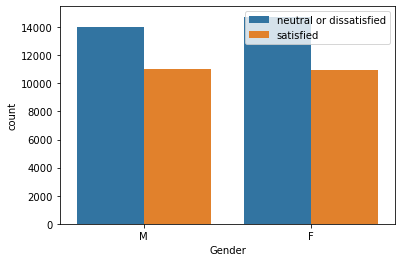

In [17]:
countgraph("Gender", data, "satisfaction")

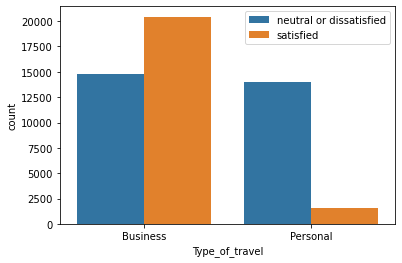

In [18]:
countgraph("Type_of_travel", data, "satisfaction")

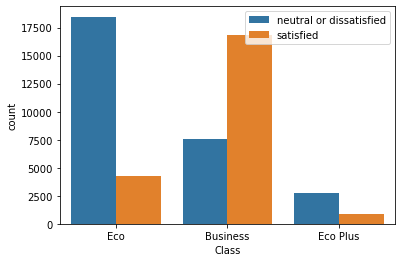

In [19]:
countgraph("Class", data, "satisfaction")

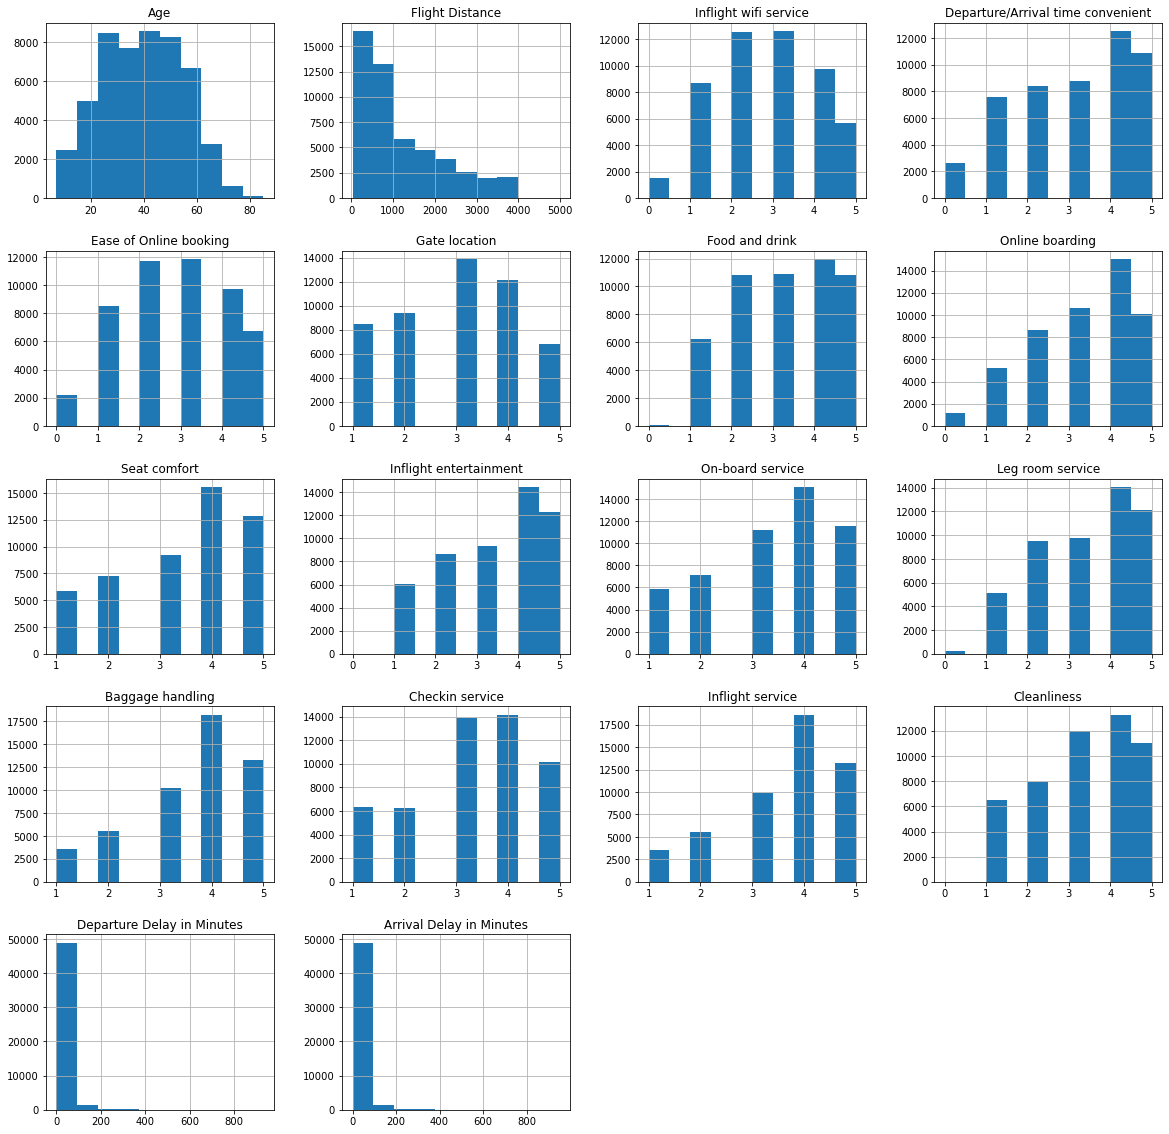

In [20]:
data.hist(figsize=(20, 20));

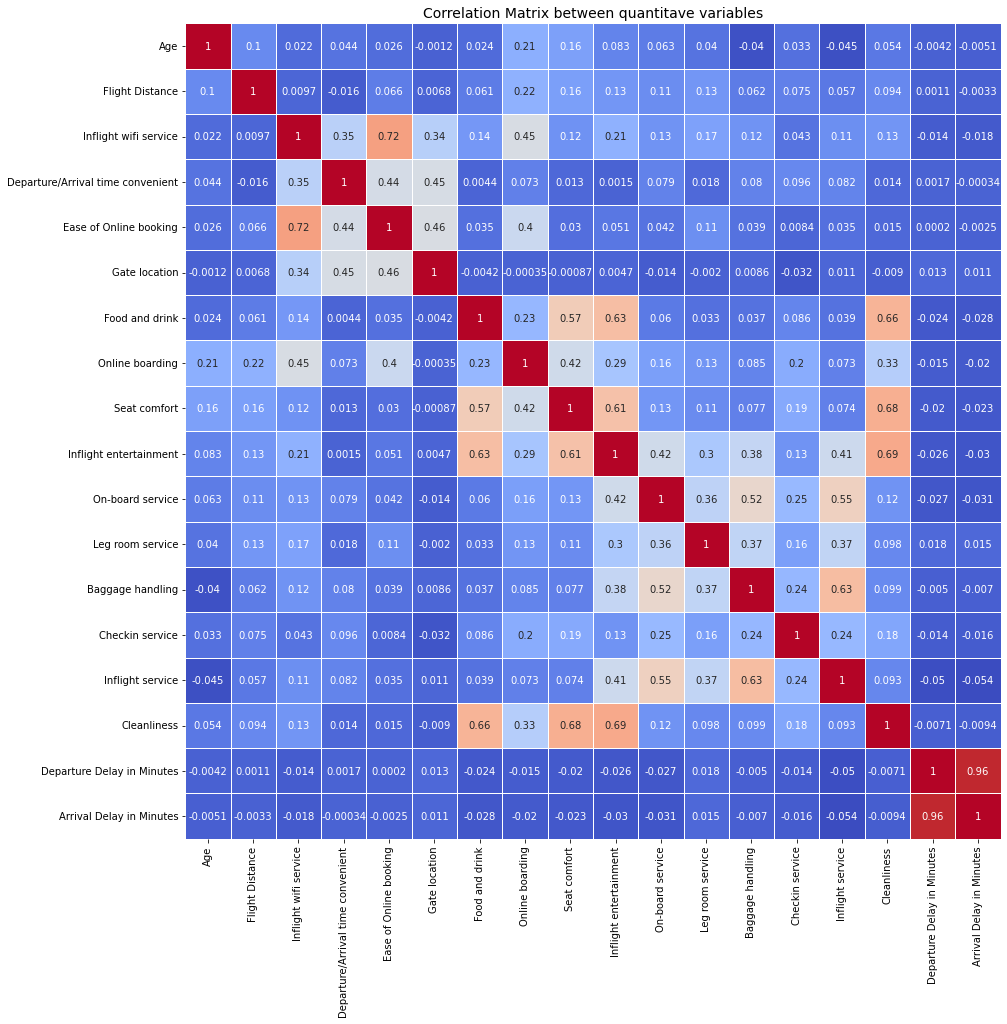

In [21]:
corr = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr,
            cmap="coolwarm",
            linewidths=1,
            linecolor='white',
            cbar = False,
            annot=True,
            square=True)
plt.title("Correlation Matrix between quantitave variables", size=14)
plt.show()

In [22]:
data.drop("Arrival Delay in Minutes",
          axis=1, 
          inplace=True)

## Modelisation

In [23]:
y = data["satisfaction"]
X = data.drop("satisfaction",
              axis=1)

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
del data
gc.collect()

90218

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [27]:
cat_var = ["Gender",
           "Type_of_travel",
           "Class"]

num_var = ["Age",
           "Flight Distance",
           "Inflight wifi service",
           "Departure/Arrival time convenient",
           "Ease of Online booking",
           "Gate location",
           "Food and drink",
           "Online boarding",
           "Seat comfort",
           "Inflight entertainment",
           "On-board service",
           "Leg room service",
           "Baggage handling",
           "Checkin service",
           "Inflight service",
           "Cleanliness",
           "Departure Delay in Minutes"]

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# creation of a pipeline with all preprocessing steps
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median", fill_value="missing")),
])

preprocessor = ColumnTransformer(
    transformers=[
    ('cat', cat_pipe, cat_var),
    ('num', num_pipe, num_var)
])

In [29]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.9545947010735744

In [32]:
confusion_matrix(y_test, y_pred)

array([[5508,  173],
       [ 288, 4184]])

### Submission

In [33]:
test_set = pd.read_csv("datasets/test_dataset.csv")
test_set.head(3)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,46,1622,1,1,1,1,5,5,5,4,...,5,276,270.0,0,1,1,0,1,0,0
1,45,552,3,1,3,4,4,5,5,5,...,5,0,0.0,1,0,0,1,0,1,0
2,52,435,2,2,2,2,3,4,5,4,...,4,0,0.0,0,1,1,0,1,0,0


In [34]:
test_set["Gender"] = test_set.apply(gender, axis=1)
test_set["Type_of_travel"] = test_set.apply(typeTravel, axis=1)
test_set["Class"] = test_set.apply(typeClass, axis=1)

test_set.drop(["Gender_Male",
               "Gender_Female",
               "Type of Travel_Business travel",
               "Type of Travel_Personal Travel",
               "Class_Business",
               "Class_Eco",
               "Class_Eco Plus"],
              axis=1,
              inplace=True)

In [35]:
test_data = preprocessor.transform(test_set)
target = model.predict(test_data)
res = pd.DataFrame(target)
res.columns = ["satisfaction"]

In [36]:
def replace_predict(df):
    if df["satisfaction"] == "0":
        return "neutral or dissatisfied"
    else:
        return "satisfied"

In [37]:
res["satisfaction"] = res.apply(replace_predict, axis=1)
res.to_csv("submission.csv", index = False)

In [ ]:
del X_train, X_test, y_train, y_test, model, res, target
gc.collect()